<a href="https://colab.research.google.com/github/ampereapescador/MetodosI_AnaPerea_JuanGomez/blob/main/TareaIntegracion3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:

import sympy as sp
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
from scipy.special import roots_legendre


# 3 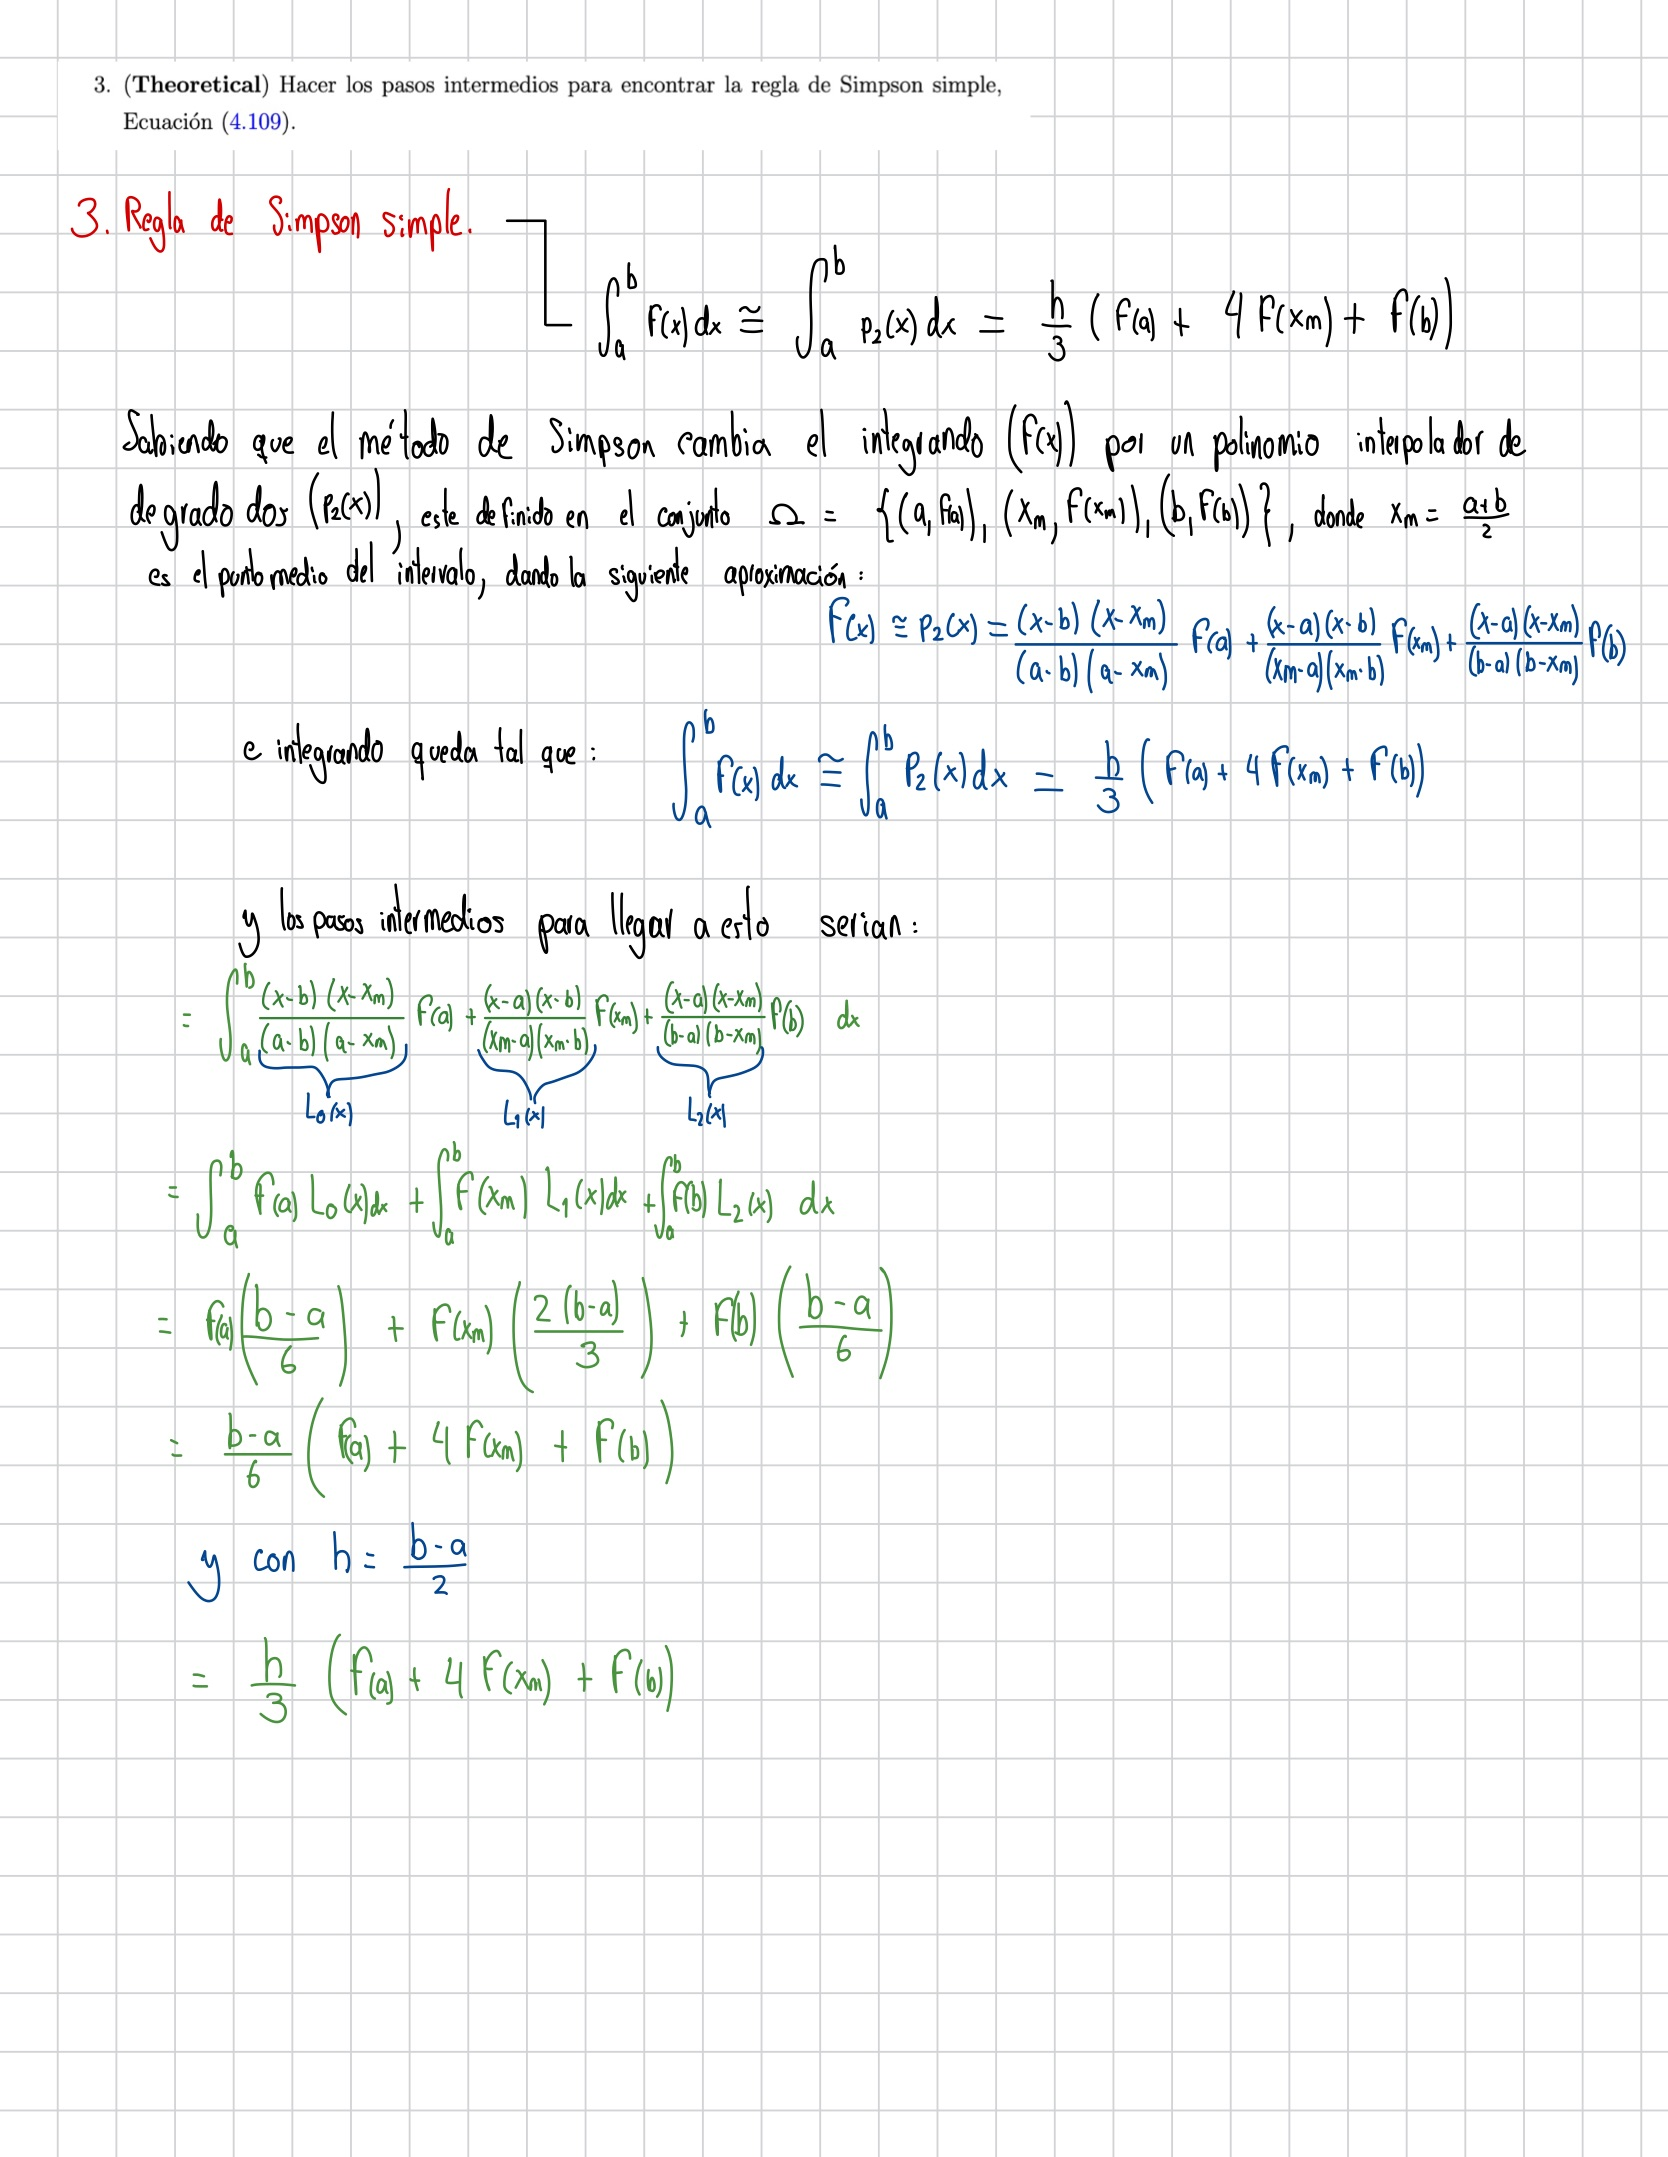

In [3]:
#5

def f(x):
    return np.exp(-x**2)

a = 0
b = 1
n = 4
h = (b - a) / n

x = np.linspace(a, b, n+1)
y = f(x)

integral = (h / 2) * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])

print(f"El valor aproximado de la integral es: {integral:.5f}")

El valor aproximado de la integral es: 0.74298


In [6]:
#6
def integrando(x, R, a):
    return np.sqrt(a**2 - x**2) / (R + x)

R = 0.5
a = 0.01
error = 0.005

def trapecio(f, a, b, n, R, a_param):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x, R, a_param)
    integral = (h / 2) * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])
    return integral

def simpson(f, a, b, n, R, a_param):
    if n % 2 == 1:
        n += 1
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x, R, a_param)
    integral = (h / 3) * (y[0] + 4 * np.sum(y[1:n:2]) + 2 * np.sum(y[2:n-1:2]) + y[-1])
    return integral

n_trapecio = 4
integral_trapecio = trapecio(integrando, -a, a, n_trapecio, R, a)
print(f"Integral aproximada con el método del trapecio: {integral_trapecio:.5f}")

n_simpson = 4
integral_simpson = simpson(integrando, -a, a, n_simpson, R, a)
print(f"Integral aproximada con la regla de Simpson 1/3: {integral_simpson:.5f}")

Integral aproximada con el método del trapecio: 0.00027
Integral aproximada con la regla de Simpson 1/3: 0.00030


In [8]:
# 7

R = 1
n = 100
h = 2 * R / n

# Grilla en el rango [-R, R]
x = np.linspace(-R, R, n + 1)
y = np.linspace(-R, R, n + 1)

volumen = 0

def f(x, y):
    if x**2 + y**2 <= 1:
        val = 1 - x**2 - y**2
        return np.sqrt(val) if val >= 0 else 0
    else:
        return 0

volumen = 0

for i in range(n):
    for j in range(n):
        f1 = f(x[i], y[j])
        f2 = f(x[i + 1], y[j])
        f3 = f(x[i], y[j + 1])
        f4 = f(x[i + 1], y[j + 1])

        # Promedio de los valores de la función en los vértices
        prom = (f1 + f2 + f3 + f4) / 4


        volumen += prom * h**2
volumen

2.0938469983337344

In [11]:
# 9

x, a, b = sp.symbols('x a b')

h = (b - a) / 3
x_0 = a
x_1 = a + h
x_2 = a + 2*h
x_3 = a + 3*h

L_0 = ((x - x_1)*(x - x_2)*(x - x_3)) / ((x_0 - x_1)*(x_0 - x_2)*(x_0 - x_3))
L_1 = ((x - x_0)*(x - x_2)*(x - x_3)) / ((x_1 - x_0)*(x_1 - x_2)*(x_1 - x_3))
L_2 = ((x - x_0)*(x - x_1)*(x - x_3)) / ((x_2 - x_0)*(x_2 - x_1)*(x_2 - x_3))
L_3 = ((x - x_0)*(x - x_1)*(x - x_2)) / ((x_3 - x_0)*(x_3 - x_1)*(x_3 - x_2))

Int_L_0 = sp.integrate(L_0, (x, a, b))
Int_L_1 = sp.integrate(L_1, (x, a, b))
Int_L_2 = sp.integrate(L_2, (x, a, b))
Int_L_3 = sp.integrate(L_3, (x, a, b))

Int_L_0, Int_L_1, Int_L_2, Int_L_3

(-9*a**4/(8*a**3 - 24*a**2*b + 24*a*b**2 - 8*b**3) - a**3*(-3*a - 6*b)/(2*a**3 - 6*a**2*b + 6*a*b**2 - 2*b**3) - a**2*(2*a**2 + 14*a*b + 11*b**2)/(4*a**3 - 12*a**2*b + 12*a*b**2 - 4*b**3) - a*(-2*a**2*b - 5*a*b**2 - 2*b**3)/(2*a**3 - 6*a**2*b + 6*a*b**2 - 2*b**3) + 9*b**4/(8*a**3 - 24*a**2*b + 24*a*b**2 - 8*b**3) + b**3*(-3*a - 6*b)/(2*a**3 - 6*a**2*b + 6*a*b**2 - 2*b**3) + b**2*(2*a**2 + 14*a*b + 11*b**2)/(4*a**3 - 12*a**2*b + 12*a*b**2 - 4*b**3) + b*(-2*a**2*b - 5*a*b**2 - 2*b**3)/(2*a**3 - 6*a**2*b + 6*a*b**2 - 2*b**3),
 27*a**4/(8*a**3 - 24*a**2*b + 24*a*b**2 - 8*b**3) - a**3*(12*a + 15*b)/(2*a**3 - 6*a**2*b + 6*a*b**2 - 2*b**3) - a**2*(-9*a**2 - 54*a*b - 18*b**2)/(4*a**3 - 12*a**2*b + 12*a*b**2 - 4*b**3) - a*(9*a**2*b + 18*a*b**2)/(2*a**3 - 6*a**2*b + 6*a*b**2 - 2*b**3) - 27*b**4/(8*a**3 - 24*a**2*b + 24*a*b**2 - 8*b**3) + b**3*(12*a + 15*b)/(2*a**3 - 6*a**2*b + 6*a*b**2 - 2*b**3) + b**2*(-9*a**2 - 54*a*b - 18*b**2)/(4*a**3 - 12*a**2*b + 12*a*b**2 - 4*b**3) + b*(9*a**2*b + 18*a*b*

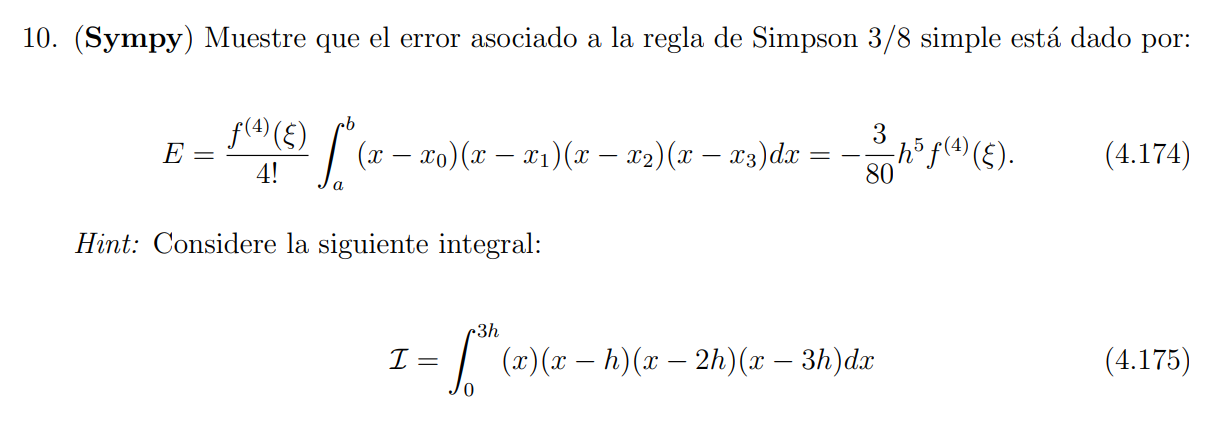

In [12]:
# 10. Error asociado a la regla de Simpson
x, h = sp.symbols('x h')

integrand = x * (x - h) * (x - 2*h) * (x - 3*h)

# Calcular la integral en el intervalo de 0 a 3h
integral = sp.integrate(integrand, (x, 0, 3*h))

simplified_integral = sp.simplify(integral)

# Resultado
simplified_integral

-9*h**5/10

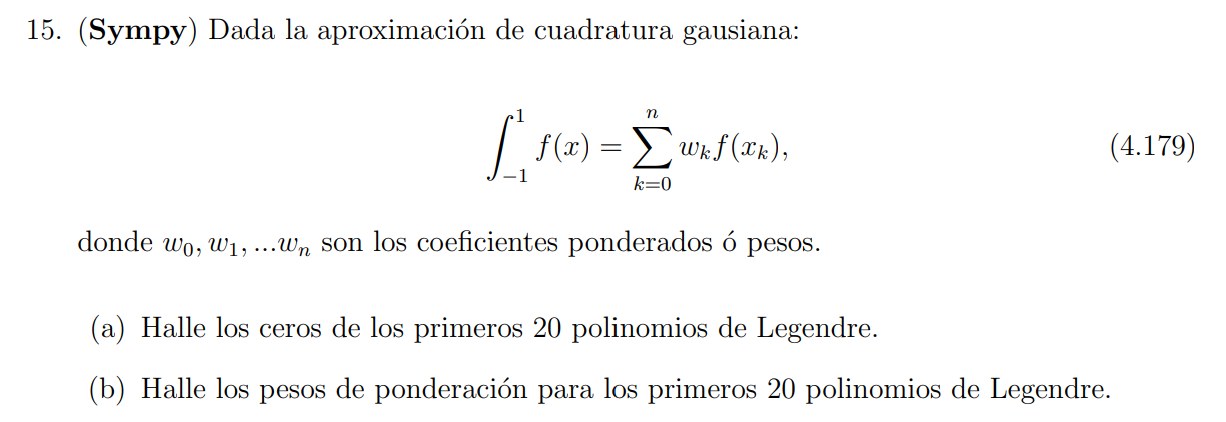

In [13]:
# 15. Aproximacion de cuadratura gausiana

n_max = 20

# listas de los ceros y los pesos
zeros_legendre = []
weights_legendre = []

# Elementos listas
for n in range(1, n_max + 1):
    zeros, weights = roots_legendre(n)
    zeros_legendre.append(zeros)
    weights_legendre.append(weights)

# Resultado
for i in range(n_max):
    print(f"Polinomio de Legendre de grado {i+1}:")
    print(f"Ceros: {zeros_legendre[i]}")
    print(f"Pesos: {weights_legendre[i]}\n")

Polinomio de Legendre de grado 1:
Ceros: [0.]
Pesos: [2.]

Polinomio de Legendre de grado 2:
Ceros: [-0.57735027  0.57735027]
Pesos: [1. 1.]

Polinomio de Legendre de grado 3:
Ceros: [-0.77459667  0.          0.77459667]
Pesos: [0.55555556 0.88888889 0.55555556]

Polinomio de Legendre de grado 4:
Ceros: [-0.86113631 -0.33998104  0.33998104  0.86113631]
Pesos: [0.34785485 0.65214515 0.65214515 0.34785485]

Polinomio de Legendre de grado 5:
Ceros: [-0.90617985 -0.53846931  0.          0.53846931  0.90617985]
Pesos: [0.23692689 0.47862867 0.56888889 0.47862867 0.23692689]

Polinomio de Legendre de grado 6:
Ceros: [-0.93246951 -0.66120939 -0.23861919  0.23861919  0.66120939  0.93246951]
Pesos: [0.17132449 0.36076157 0.46791393 0.46791393 0.36076157 0.17132449]

Polinomio de Legendre de grado 7:
Ceros: [-0.94910791 -0.74153119 -0.40584515  0.          0.40584515  0.74153119
  0.94910791]
Pesos: [0.12948497 0.27970539 0.38183005 0.41795918 0.38183005 0.27970539
 0.12948497]

Polinomio de Leg

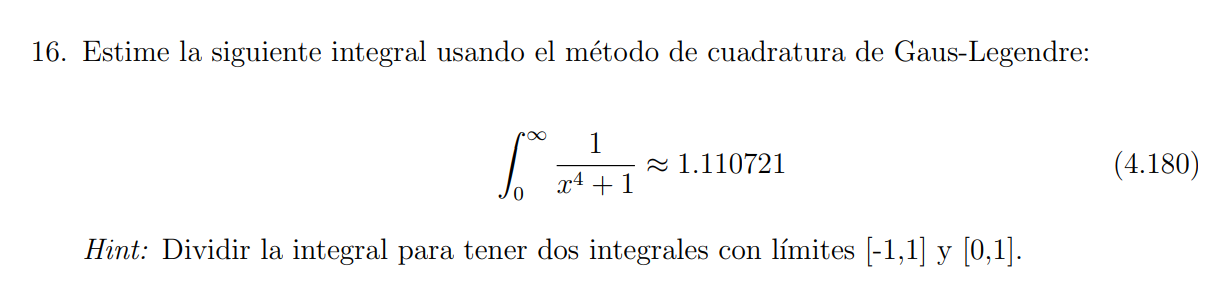

In [16]:


x = sp.symbols('x')


f = 1 / (x**4 + 1)

n = 5

# Función
def legendre_w(n):

    Pn = sp.legendre(n, x)
    roots = sp.solvers.solve(Pn, x)

    # Pesos
    weights = []
    for r in roots:

        Pn_derivada = sp.diff(Pn, x)
        weight = 2 / ((1 - r**2) * (Pn_derivada.subs(x, r))**2)
        weights.append(weight)

    return [sp.N(r) for r in roots], [sp.N(w) for w in weights]

# Función de la cuadratura de Gauss-Legendre usando SymPy
def gauss_legendre_integration(f, a, b, n):

    roots, weights = legendre_w(n)

    x_mapped = [0.5 * (b - a) * xi + 0.5 * (b + a) for xi in roots]

    integral = sum([weights[i] * f.subs(x, x_mapped[i]) for i in range(n)])

    integral *= 0.5 * (b - a)

    return sp.N(integral)

#  intervalo [0, 1]
integral_0_1 = gauss_legendre_integration(f, 0, 1, n)

#  intervalo [1, inf]
t = sp.symbols('t')
g = f.subs(x, 1/t) / t**2

integral_1_inf = gauss_legendre_integration(g, 0, 1, n)


total_integral = sp.N(integral_0_1 + integral_1_inf)

print(f"Resultado integral: {total_integral}")

t = sp.symbols('t')

expr = 0.866971017474298 + 1.0 / (t**2 * (1.0 + t**(-4)))

# intervalo [0, 1]
integral = sp.integrate(expr, (t, 0, 1))


resultado = sp.N(integral)

# Mostrar el resultado
print(f"Resultado integral: {resultado}")


Resultado integral: 0.866971017474298 + 1.0/(t**2*(1.0 + t**(-4)))
Resultado integral: 1.11071876467398


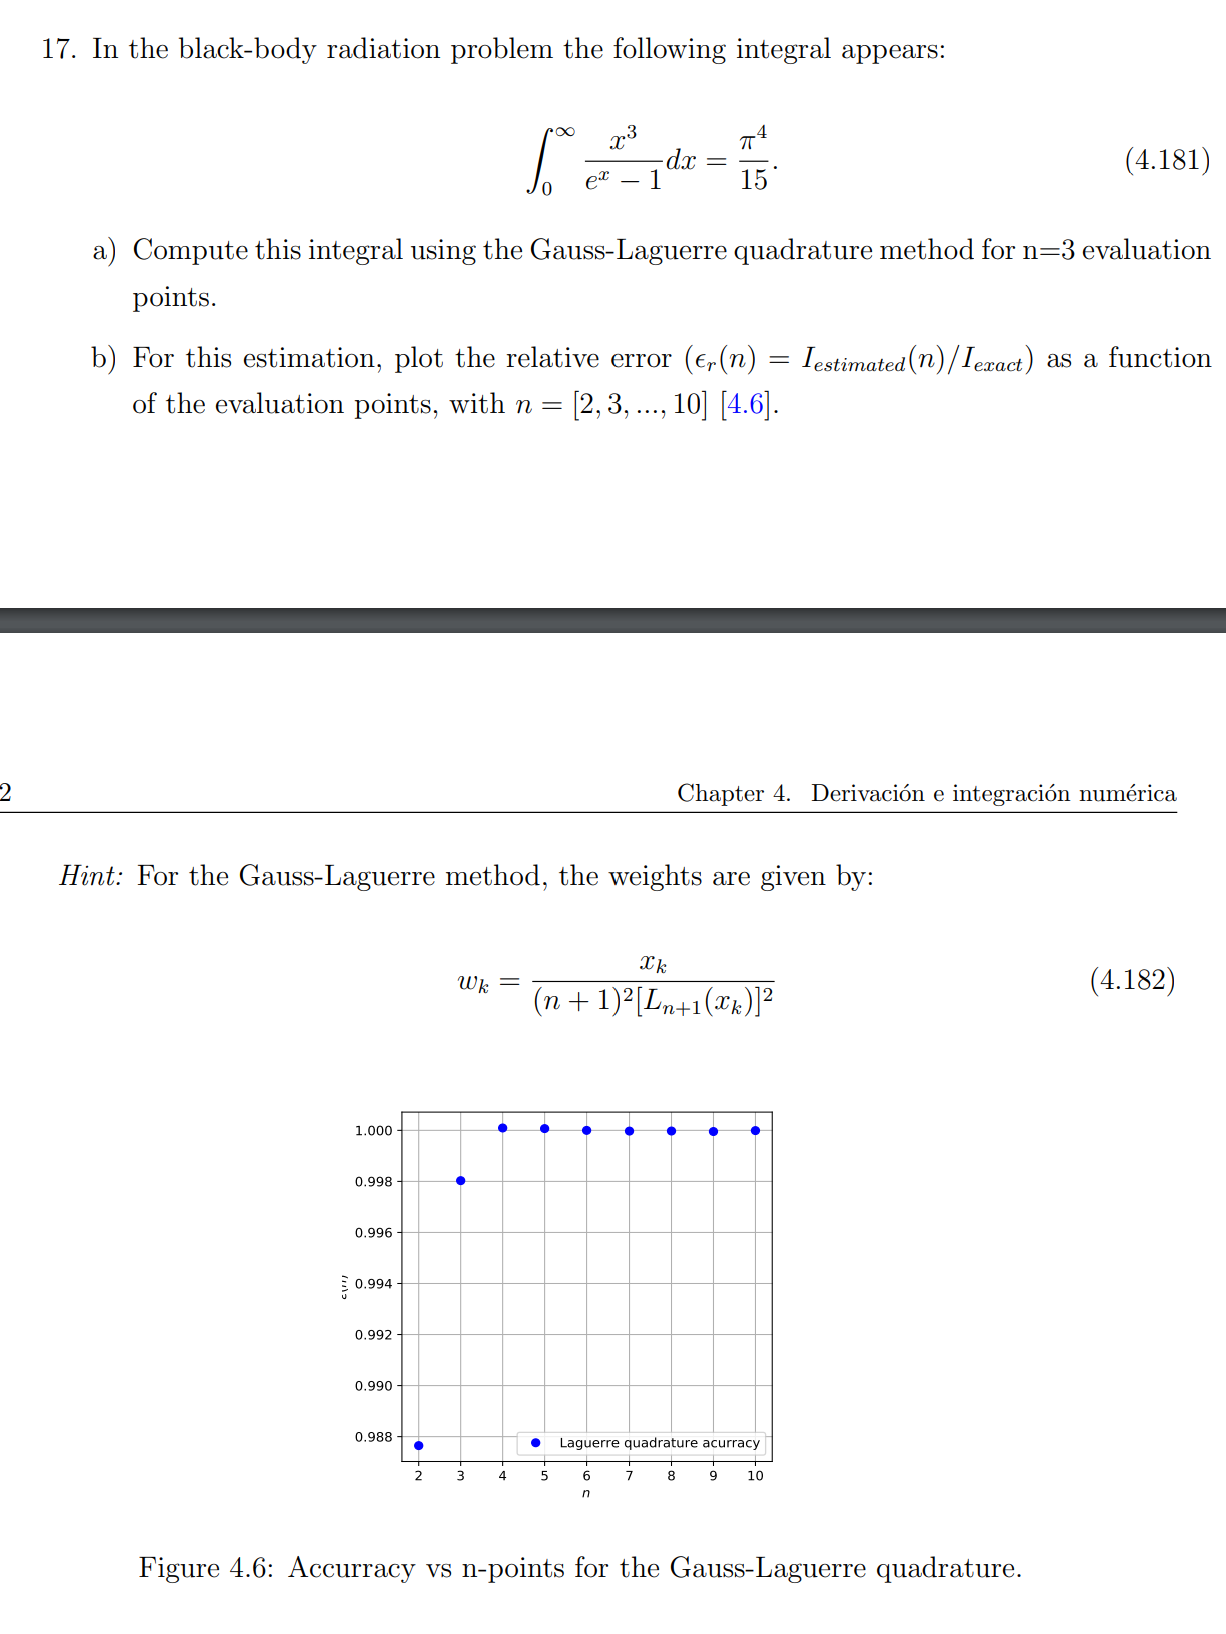

Valor estimado de la integral para n=3: 0.10874553844610477


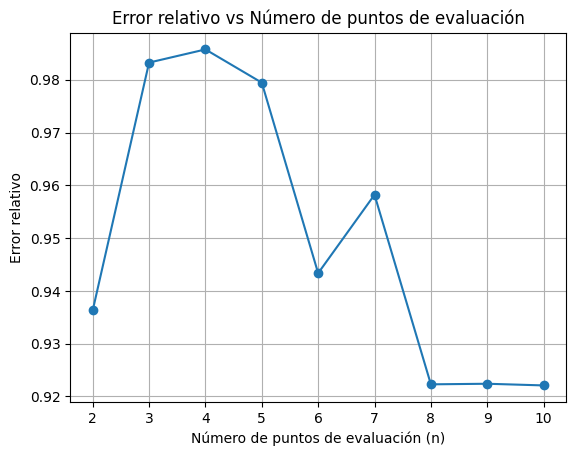

Valor de la integral: 6.49393940226683
Error estimado: 2.628470028924825e-09


<ipython-input-30-a8e891b8591f>:92: RuntimeWarning: overflow encountered in exp
  return x**3 / (np.exp(x) - 1)


In [30]:
# 17 Con ayuda de GPT

#Desarrollo en clase
f = lambda x: x**3 / (np.exp(x) - 1)


I_exact = (np.pi**4) / 15

def laguerre_polynomial(n, x):
    if n == 0:
        return 1
    elif n == 1:
        return 1 - x
    else:
        L_n_1 = laguerre_polynomial(n - 1, x)
        L_n_2 = laguerre_polynomial(n - 2, x)
        return ((2 * (n - 1) + 1 - x) * L_n_1 - (n - 1) * L_n_2) / n

# Derivada de los polinomios de Laguerre
def laguerre_polynomial_derivative(n, x):
    h = 1e-5
    return (laguerre_polynomial(n, x + h) - laguerre_polynomial(n, x - h)) / (2 * h)

def newton_raphson_laguerre(n, initial_guess):
    tolerance = 1e-14
    max_iterations = 1000
    x = initial_guess

    for i in range(max_iterations):
        L_n = laguerre_polynomial(n, x)
        L_n_prime = laguerre_polynomial_derivative(n, x)
        x_new = x - L_n / L_n_prime
        if abs(x_new - x) < tolerance:
            return x_new
        x = x_new
    raise ValueError(f"No se encontró raíz para n={n} en {max_iterations} iteraciones.")

def gauss_laguerre_roots_weights(n):

    initial_guesses = np.linspace(0.1, 10, n)

    #  Newton-Raphson
    roots = np.array([newton_raphson_laguerre(n, guess) for guess in initial_guesses])

    # Calcular los pesos
    weights = np.array([root / ((n + 1)**2 * laguerre_polynomial(n + 1, root)**2) for root in roots])

    return roots, weights

f = lambda x: x**3 / (np.exp(x) - 1)

def gauss_laguerre_quadrature_manual(n):

    roots, weights = gauss_laguerre_roots_weights(n)


    I_estimated = np.sum(weights * f(roots))

    return I_estimated

# Probar la función para n=3
n = 3
I_estimated = gauss_laguerre_quadrature_manual(n)
print(f"Valor integral para n={n}: {I_estimated}")

n_values = np.arange(2, 11)
errors = []

# Calcular el error relativo para cada n
for n in n_values:
    I_estimated =gauss_laguerre_quadrature_manual(n)
    error = abs(I_estimated - I_exact) / I_exact
    errors.append(error)

# Graficar el error relativo
plt.plot(n_values, errors, marker='o')
plt.xlabel('Número de puntos evaluados (#)')
plt.ylabel('Error relativo')
plt.title('Error relativo vs Número de puntos evaluados')
plt.grid(True)
plt.show()

from scipy.integrate import quad


def f(x):
    return x**3 / (np.exp(x) - 1)

integral, error = quad(f, 0, np.inf)

print(f"Resultado integral: {integral}")
print(f"Error estimado: {error}")

